In [5]:
#!pip3 install -U scikit-learn scipy matplotlib

import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

## Reading the dataset
#path = os.getcwd()+"/Traning and Testing Tets (5% of the entier dataset)/All features/"
path = os.getcwd()+"/"
file_paths = ['UNSW_2018_IoT_Botnet_Full5pc_1.csv', 'UNSW_2018_IoT_Botnet_Full5pc_2.csv','UNSW_2018_IoT_Botnet_Full5pc_3.csv','UNSW_2018_IoT_Botnet_Full5pc_4.csv']
file_paths = ['final.csv'] ## upsampled and downsampled data

# Initialize an empty list to store individual DataFrames
dataframes = []
# Read the header from the first file
header = pd.read_csv(path+file_paths[0], nrows=1).columns.tolist()

# Loop through the file paths, read each CSV, and append to the list
for file_path in file_paths:
    df = pd.read_csv(path+file_path, skiprows=[0], names=header)
    dataframes.append(df)

# Concatenate all DataFrames in the list into one
combined_df = pd.concat(dataframes, ignore_index=True)

/Users/tasmiashahriar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
<ipython-input-5-86a91ee53cf0>:21: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+file_path, skiprows=[0], names=header)


In [6]:
combined_df 

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategory,category
0,1873521,1.528096e+09,e,1,tcp,1,192.168.100.149,55866,192.168.100.3,80,...,11.153500,100,100,10.398500,11.153500,213,213,1,TCP,DDoS
1,2411088,1.528096e+09,e s,2,tcp,1,192.168.100.148,45045,192.168.100.3,80,...,0.417619,100,97,0.419152,0.417619,400,388,1,TCP,DDoS
2,3306904,1.528099e+09,e,1,udp,3,192.168.100.148,1731,192.168.100.3,80,...,0.630458,100,26,0.797278,0.630458,804,286,1,UDP,DDoS
3,3086188,1.528099e+09,e,1,udp,3,192.168.100.149,46599,192.168.100.3,80,...,0.575598,100,100,0.575598,0.575598,700,700,1,UDP,DDoS
4,1805564,1.528096e+09,e,1,tcp,1,192.168.100.148,43105,192.168.100.3,80,...,0.000000,100,72,0.000000,0.000000,100,72,1,TCP,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3668456,1.529381e+09,e,1,arp,2,192.168.100.3,-1,192.168.100.150,-1,...,0.007059,25,48,0.017653,0.017653,6,6,1,Keylogging,Theft
49996,3668505,1.529381e+09,e,1,tcp,1,192.168.100.150,35040,192.168.100.3,22,...,9.889330,19,19,9.016750,9.889330,441,441,1,Keylogging,Theft
49997,3668474,1.529381e+09,e,1,tcp,1,192.168.100.3,54788,192.168.100.149,4433,...,13621.600000,23,48,15384.600000,13310.700000,46,94,1,Keylogging,Theft
49998,3668498,1.529381e+09,e,1,tcp,1,192.168.100.3,54811,192.168.100.149,4433,...,13621.600000,23,48,14184.400000,13310.700000,46,94,1,Keylogging,Theft


In [7]:
numeric_columns = [
'pkts',
'bytes',
'seq',
'dur',
'mean',
'stddev',
'sum',
'min',
'max',
'spkts',
'dpkts',
'sbytes',
'dbytes',
'rate',
'srate',
'drate',
'TnBPSrcIP',
'TnBPDstIP',
'TnP_PSrcIP',
'TnP_PDstIP',
'TnP_PerProto',
'TnP_Per_Dport',
'AR_P_Proto_P_SrcIP',
'AR_P_Proto_P_DstIP',
'N_IN_Conn_P_SrcIP',
'N_IN_Conn_P_DstIP',
'AR_P_Proto_P_Sport',
'AR_P_Proto_P_Dport',
'Pkts_P_State_P_Protocol_P_DestIP',
'Pkts_P_State_P_Protocol_P_SrcIP']

In [8]:
categorical_columns =[
'flgs',
'flgs_number',
'proto',
'proto_number',
'saddr',
'sport',
'daddr',
'dport',
'state',
'state_number',
'pkSeqID'
]

categorical_columns =[
'daddr',
'state',
'state_number',
]
class_columns = [
'category',
'subcategory'
]

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numeric columns
#combined_df[numeric_columns] = scaler.fit_transform(combined_df[numeric_columns])
standardized_df = scaler.fit_transform(combined_df[numeric_columns])


In [10]:
scaler = MinMaxScaler()
#combined_df[numeric_columns] = scaler.fit_transform(combined_df[numeric_columns])
normalized_df = scaler.fit_transform(combined_df[numeric_columns])


In [11]:
#normalized_df[0]
selected_cate_part = combined_df[categorical_columns]
selected_cate_part
class_part = combined_df[class_columns]



In [12]:

norm_df = pd.DataFrame(columns=numeric_columns,data=normalized_df)
selected_norm_df = norm_df[['max', 'mean','stddev','min','seq','N_IN_Conn_P_SrcIP','N_IN_Conn_P_DstIP','TnP_PerProto','dur']]


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already standardized your DataFrame 'combined_df'

# Create a PCA object with the number of components you want to retain
n_components = 8  # You can change this to the desired number of components
pca = PCA(n_components=n_components)


In [14]:
# Fit and transform the normalized data
#pca_result = pca.fit_transform(standardized_df)
pca_result = pca.fit_transform(normalized_df)


# Create a DataFrame from the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

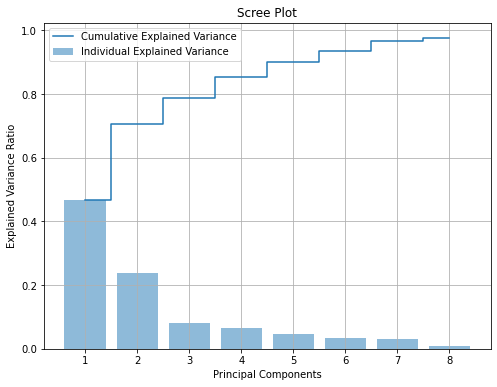

In [15]:
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

In [43]:
pca.components_


array([[-4.56603228e-02, -6.59563737e-05, -6.81703223e-06,
        -4.56467406e-02, -5.98206662e-02,  1.34830445e-03,
        -5.42702279e-01, -3.63538717e-01, -4.81370395e-03,
        -2.81533186e-01, -6.93982509e-01, -1.45198110e-04,
         1.32849830e-05, -1.07513979e-05, -2.45327080e-06,
         7.99128151e-04,  8.18327690e-06,  2.46889919e-05,
        -3.77177000e-05, -5.07461037e-05, -1.66056027e-03,
        -1.82667425e-03, -1.62152010e-03, -1.72779003e-03,
         4.05395676e-04,  9.41295743e-04, -4.62811721e-02,
        -4.98420909e-02,  5.01734588e-04,  8.85646579e-04,
        -4.03855290e-03, -3.49747238e-03],
       [-8.09122415e-03,  3.34701061e-05,  1.69355076e-05,
        -8.09030501e-03, -5.71266428e-02, -1.38698493e-03,
         2.21522562e-01, -6.86097705e-01,  8.01209392e-04,
         6.84343535e-01, -8.76102645e-02,  5.56983425e-05,
         1.12415488e-05,  2.26513742e-05,  1.05761810e-05,
         1.59932861e-04,  1.78408961e-06,  4.88523539e-06,
         3.17

In [16]:
# Fit and transform the standardized data
pca_result = pca.fit_transform(standardized_df)

# Create a DataFrame from the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

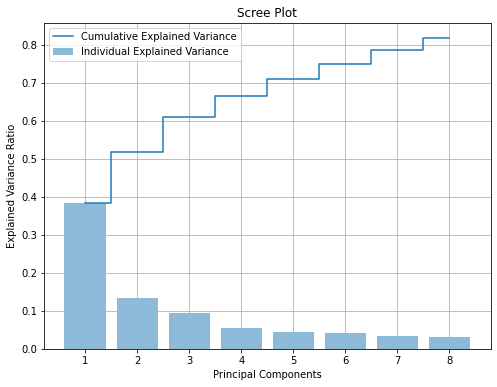

In [17]:
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

In [61]:
pca.components_


array([[ 2.83591857e-01,  2.75347145e-01, -2.62838355e-02,
         2.02040110e-01,  8.76948772e-02, -8.24103956e-03,
         2.59633974e-01,  7.31831315e-02,  6.78167545e-02,
         2.81266326e-01,  2.23930090e-01,  2.77429770e-01,
         2.23060571e-01, -1.00232292e-02, -9.40637020e-04,
        -2.29246228e-03,  2.26720953e-01,  2.60752348e-01,
         2.31063155e-01,  2.59623120e-01,  1.09348667e-01,
         2.62007963e-01, -1.09832390e-02, -1.06213062e-02,
        -6.13702949e-02, -5.64378527e-02, -1.02080084e-02,
        -1.00993600e-02,  2.57976761e-01,  2.57494108e-01],
       [ 8.38444493e-04,  2.23766173e-03, -3.48419290e-01,
         3.93340730e-02, -3.93496365e-01, -3.47404835e-01,
        -1.23015964e-02, -2.33957184e-01, -4.24163922e-01,
         8.46815420e-04,  6.38691575e-04,  3.07034821e-03,
         6.45324030e-04,  1.81651968e-01,  3.37085119e-02,
         4.42726962e-02,  4.11330455e-02,  9.70421918e-03,
         3.72389988e-02,  1.24531904e-03,  1.84795369e-